In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('cars.csv')

In [3]:
data = data[data['CO2 Emissions(g/km)'] < 600]

In [4]:
X = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y = data['CO2 Emissions(g/km)']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
print("R² score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² score: 0.9697637162193874
Mean Squared Error: 104.00155060541175


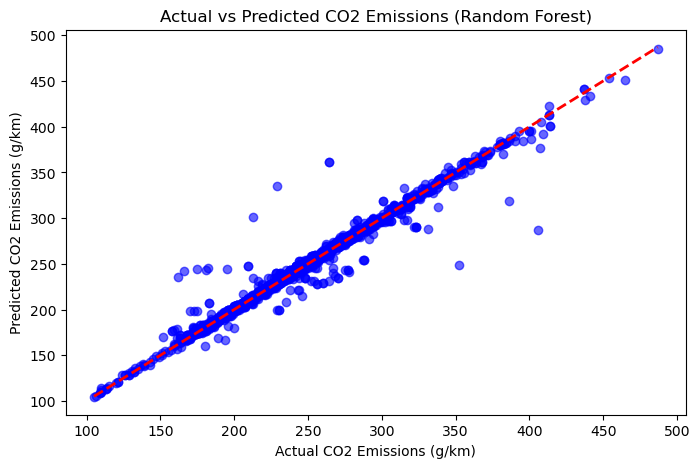

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Actual vs Predicted CO2 Emissions (Random Forest)')
plt.show()

In [10]:
engine_sizes = np.linspace(0.9, 6.0, 20)   # engine sizes from 0.9L to 6L
cylinders = np.array([4]*20)               # assume 4 cylinders
fuel_consumption = np.array([8]*20)

In [11]:
new_cars = np.column_stack((engine_sizes, cylinders, fuel_consumption))
predicted_co2_new = model.predict(new_cars)

c:\Users\Shreyas Kulkarni\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


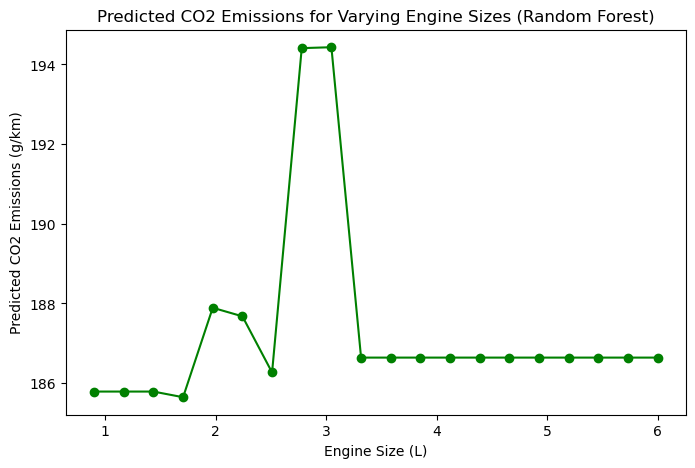

In [12]:
plt.figure(figsize=(8,5))
plt.plot(engine_sizes, predicted_co2_new, marker='o', color='green')
plt.xlabel('Engine Size (L)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Predicted CO2 Emissions for Varying Engine Sizes (Random Forest)')
plt.show()

In [24]:
new_car = [[4, 4, 5]]  # engine_size=1.0 L, cylinders=3, fuel=7.5 L/100 km
predicted_co2 = model.predict(new_car)
print("Predicted CO2 for new car:", predicted_co2[0])

Predicted CO2 for new car: 116.08325595238104


c:\Users\Shreyas Kulkarni\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
